# MOWNIT - LAB 4 - Symulacja wyzarzania

In [2]:
import random
import math
import matplotlib.pyplot as plt
import copy
import numpy
import pandas as pd

In [3]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [27]:
def matrix_distance(points):

    def distance(p1, p2):
        x2 = (p1.x - p2.x)**2
        y2 = (p1.y - p2.y)**2
        return math.sqrt(x2 + y2)

    n = len(points)
    matrix = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            r = distance(points[i], points[j])
            matrix[i][j] = r
            matrix[j][i] = r
    return matrix

def full_cycle_len(cycle, matrix):
    length = 0
    for i in range(len(matrix)):
            length += matrix[cycle[i]][cycle[i-1]]
    return length


def get_probability(x,i):
    return x*0.999


def annealing_tsp(n, points, p=0.8, temperature = lambda x,i: x*0.95, arbitrary_swap=True, iterations=2000000):
    result_in_time = []
    matrix = matrix_distance(points)
    cykl = [i for i in range(n)]
    random.shuffle(cykl)

    result_now = full_cycle_len(cykl, matrix)
    best_in_histry = [result_now, cykl]
    result_in_time.append(result_now)

    for i in range(iterations):
        if arbitrary_swap:
            swap_1 = random.randint(0,n-1)
            swap_2 = random.randint(0,n-1)
        else:
            swap_1 = random.randint(0,n-1)
            swap_2 = (swap_1 - 1) % n

        while swap_2 == swap_1:
              swap_1 = random.randint(0,n-1)

        cykl[swap_1], cykl[swap_2] = cykl[swap_2], cykl[swap_1]

        result_new = full_cycle_len(cykl, matrix)

        p = temperature(p,i)
        decision = random.random()

        if(result_new < result_now):
            result_now = result_new
            if result_now < best_in_histry[0]:
                best_in_histry = [result_now, copy.deepcopy(cykl)]
            result_in_time.append(result_now)
        else:
            if decision < p:
                result_now = result_new
                if result_now < best_in_histry[0]:
                    best_in_histry = [result_now, cykl]
                result_in_time.append(result_now)
            else:
                cykl[swap_1], cykl[swap_2] = cykl[swap_2], cykl[swap_1]

    if(best_in_histry[0] < result_now):
        return result_in_time, best_in_histry[0], best_in_histry[1]

    return result_in_time, result_now, cykl


In [5]:
def tsp(n, points, p=0.8, temperature = lambda x: x*0.95, arbitrary_swap=True, iterations=2000000):
    best = annealing_tsp(n, points, p, temperature, arbitrary_swap, iterations)
    for p in range(5,11,1):
        for i in range(4):
            new = annealing_tsp(n, points, p/10, temperature, arbitrary_swap, iterations)
            if new[1] < best[1]:
                best = new
    return best[0], best[-1], best[1]

In [6]:
def create_unifrom_graph(n):
    points = []
    for p in range(n):
        p = Point(random.uniform(0,100), random.uniform(0,100))
        points.append(p)
    return points

In [7]:
def create_normal_graph(n):
    generated = numpy.random.normal(50,50,(n,2))
    points = []
    for i in range(n):
        p = Point(generated[i][0], generated[i][1])
        points.append(p)
    return points

In [8]:
def create_seperated_group_graph(n):
    num = n // 9
    points = []
    for i in range(3):
        for j in range(3):
            for p in range(num):
                point = Point(random.uniform(i*20, i*20+5), random.uniform(j*20,j*20+5))
                points.append(point)
    return points
        

In [9]:
def create_graph(x):
    plt.plot(x)
    plt.show()
    return

def create_chart(points, cycle):
    x=[]
    y=[]
    for p in cycle:
        point = points[p]
        x.append(point.x)
        y.append(point.y)
    x.append(points[cycle[0]].x)
    y.append(points[cycle[0]].y)
    plt.plot(x,y, color = 'green', marker = "o")
    plt.show()
    return

def create_vis(results, points, cycle):
    _, ax = plt.subplots(nrows=1, ncols=2)

    ax[0].plot(results)

    x=[]
    y=[]
    for p in cycle:
        point = points[p]
        x.append(point.x)
        y.append(point.y)
    x.append(points[cycle[0]].x)
    y.append(points[cycle[0]].y)
    ax[1].plot(x,y, marker = "o")
    plt.show()

## **Wizualizacje** podpunkt a - rozwiązania dla 3 róznych ilości punktów oraz 3 róznych rozkładów

# N = 20

### **UNIFORM DISTRIBUTION**

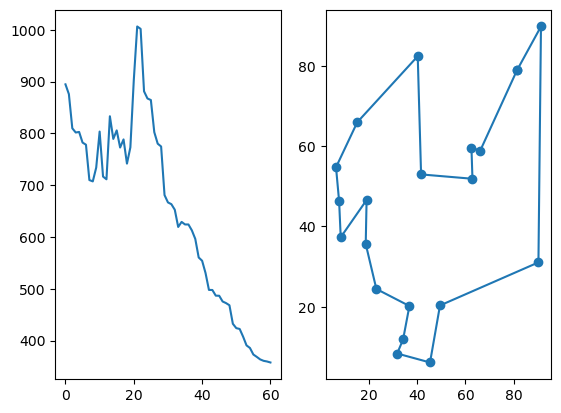

In [10]:
p = create_unifrom_graph(20)
result = tsp(20, p, 0.8, iterations=40000)
create_vis(result[0], p, result[1])

### **NORMAL DISTRIBUTION**

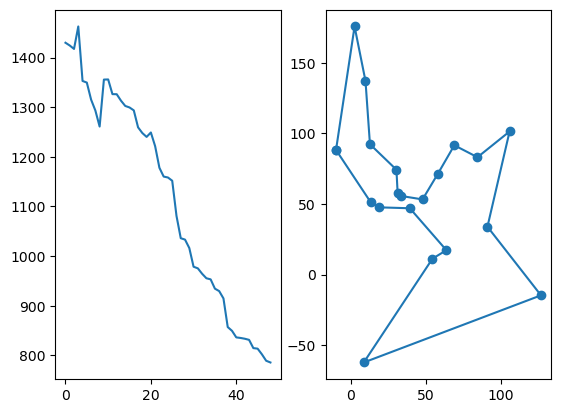

In [11]:
p = create_normal_graph(20)
result = tsp(20, p, 0.8, iterations=40000)
create_vis(result[0], p, result[1])

### **SEPARATED GROUPS GRAPH**

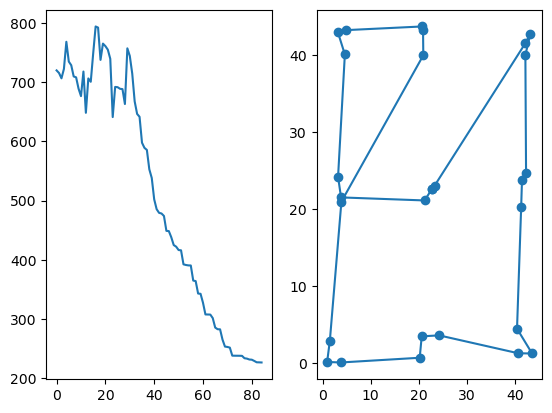

In [12]:
p = create_seperated_group_graph(27)
result = tsp(27, p, 0.8, iterations=100000)
create_vis(result[0], p, result[1])

# N=50

### **UNIFORM DISTRIBUTION**

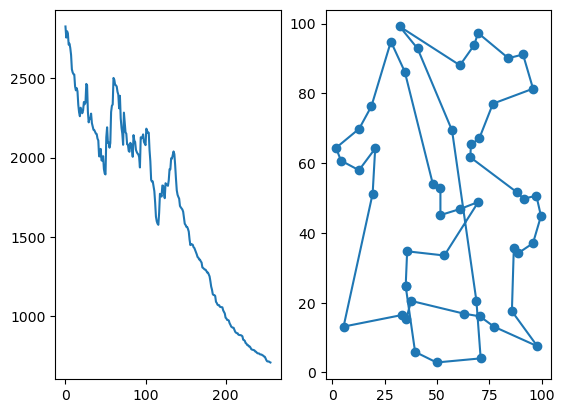

In [13]:
p = create_unifrom_graph(50)
result = tsp(50, p, 0.8, iterations=300000, temperature=lambda x: x*0.99)
create_vis(result[0], p, result[1])

### **NORMAL DISTRIBUTION**

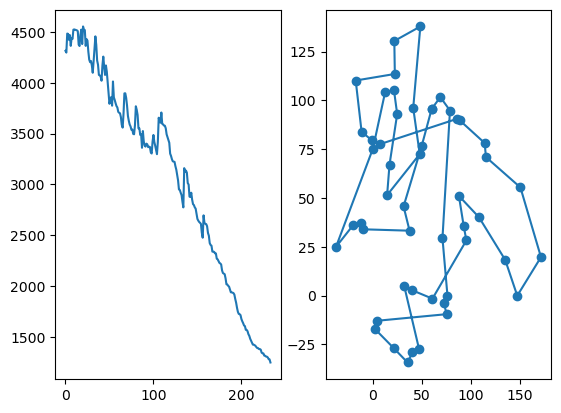

In [14]:
p = create_normal_graph(50)
result = tsp(50, p, 0.8, iterations=300000, temperature=lambda x: x*0.99)
create_vis(result[0], p, result[1])

### **SEPARATED GROUPS GRAPH**

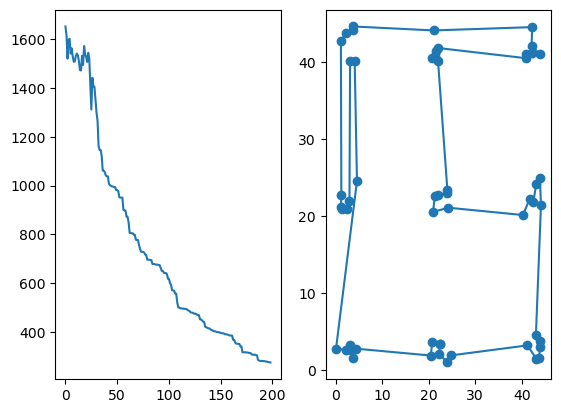

In [15]:
p = create_seperated_group_graph(54)
result = tsp(54, p, 0.8, iterations=400000,temperature=lambda x: x*0.95)
create_vis(result[0], p, result[1])

# N=100

### **UNIFORM DISTRIBUTION**

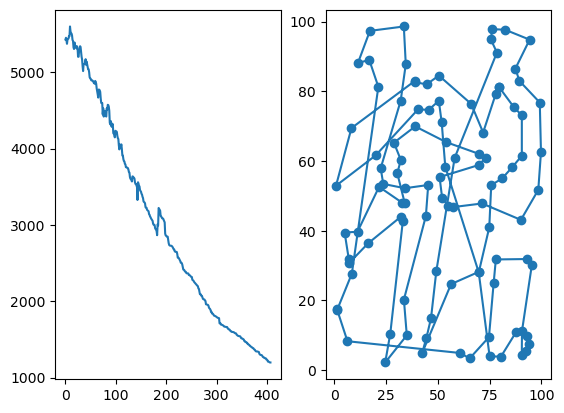

In [16]:
p = create_unifrom_graph(100)
result = tsp(100, p, 0.8, iterations=500000, temperature=lambda x: x*0.99)
create_vis(result[0], p, result[1])

### **NORMAL DISTRIBUTION**

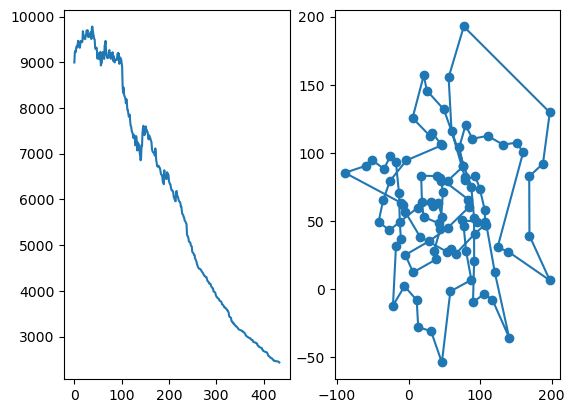

In [17]:
p = create_normal_graph(100)
result = tsp(100, p, 0.8, iterations=500000, temperature=lambda x: x*0.99)
create_vis(result[0], p, result[1])

### **SEPARATED GROUPS GRAPH**

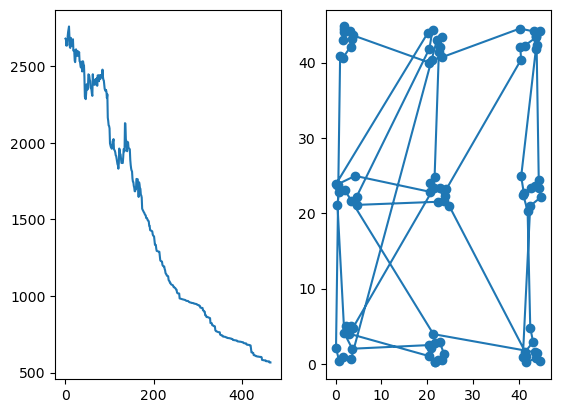

In [18]:
p = create_seperated_group_graph(90)
result = tsp(90, p, 0.8, iterations=500000,temperature=lambda x: x*0.99)
create_vis(result[0], p, result[1])

## **Wizualizacje** podpunkt b - porównywanie rozwiązań dla arbitrary swap i consecutive swap oraz dla roznych funkcji temperatury

In [19]:
random.seed = 10
dataset = pd.DataFrame()

### CONSECUTIVE SWAP

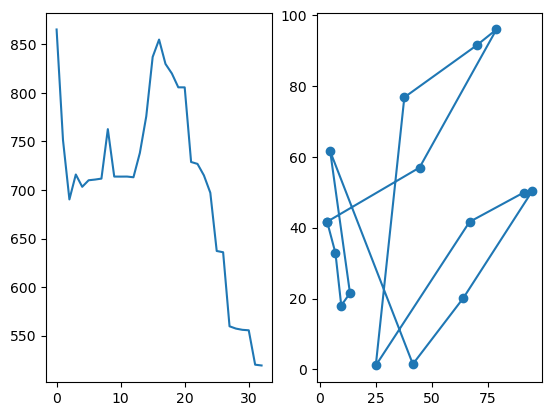

In [20]:
p = create_unifrom_graph(15)
result1 = tsp(15, p, 0.8, iterations=35000, arbitrary_swap=False)
create_vis(result1[0], p, result1[1])

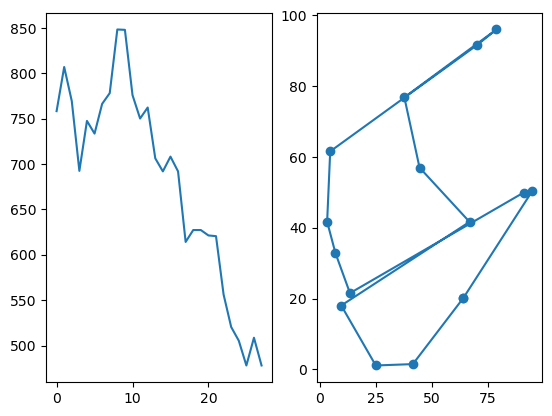

In [21]:
result = tsp(15, p, 0.8, iterations=500000, arbitrary_swap=False)
create_vis(result[0], p, result[1])

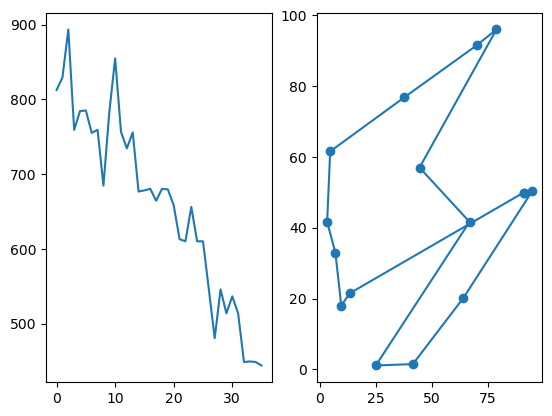

In [22]:
result4 = tsp(15, p, 0.8, iterations=500000, arbitrary_swap=False, temperature=lambda x: x*0.97)
create_vis(result4[0], p, result4[1])
dataset["Consecutive swap"] = [result1[-1], result[-1], result4[-1]]

### ARBITRARY SWAP

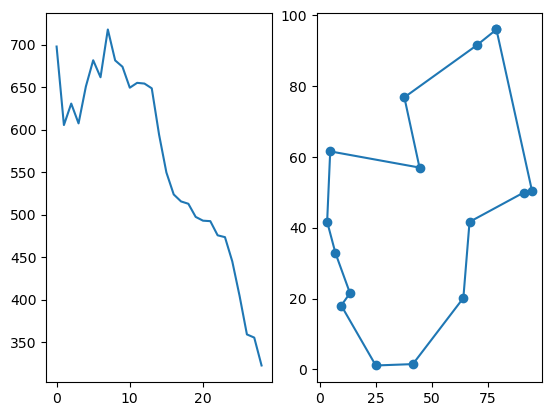

In [23]:
result = tsp(15, p, 0.8, iterations=35000, arbitrary_swap=True)
create_vis(result[0], p, result[1])
dataset["Arbitrary swap"] = [result[-1], None, None]

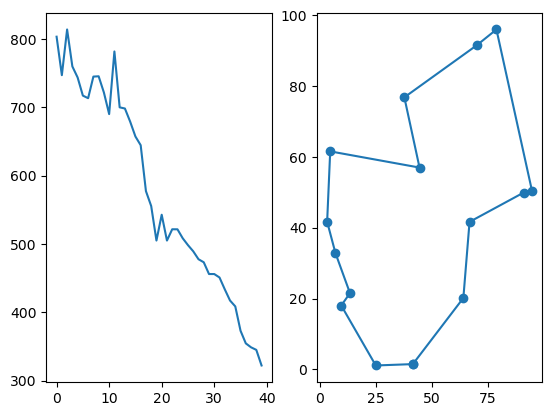

In [24]:
result2 = tsp(15, p, 0.8, iterations=50000, arbitrary_swap=True)
create_vis(result2[0], p, result2[1])

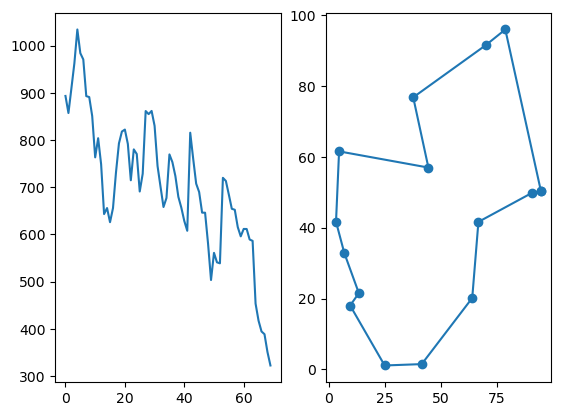

In [25]:
result4 = tsp(15, p, 0.8, iterations=500000, arbitrary_swap=True, temperature=lambda x: x*0.97)
create_vis(result4[0], p, result4[1])
dataset["Arbitrary swap"] = [result[-1], result2[-1], result4[-1]]

In [26]:
dataset.index = ["35000 iterations, temperature y = x * 0,95", "50000 iterations, temperature y = x * 0,95", "50000 iterations, temperature y = x * 0,97"]
dataset

,Consecutive swap,Arbitrary swap
"35000 iterations, temperature y = x * 0,95",519.496770,322.469437
"50000 iterations, temperature y = x * 0,95",478.006987,322.469437
"50000 iterations, temperature y = x * 0,97",444.269529,322.469437


### TEMPERATURE x2 = x1 * 0,95

In [242]:
dataset = pd.DataFrame()

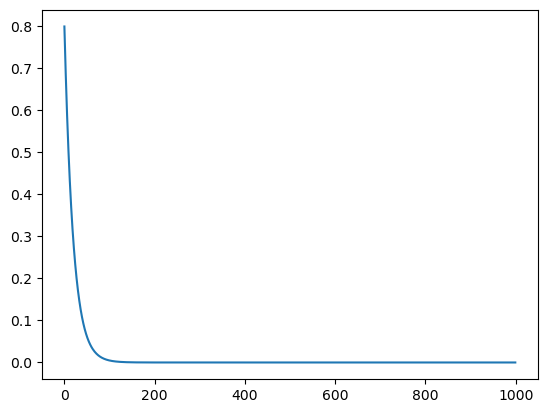

In [243]:
x=[]
x0 = 0.8
for i in range(1000):
    x.append(x0)
    x0 = x0*0.95
create_graph(x)

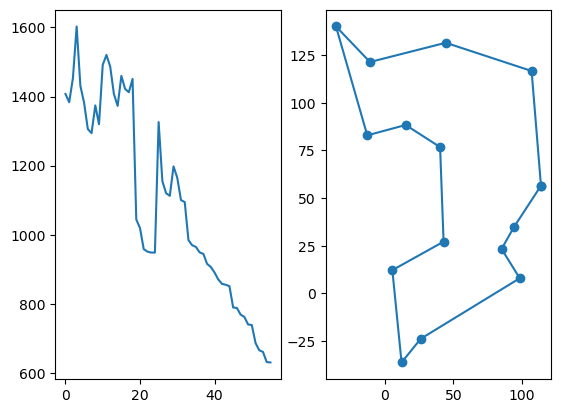

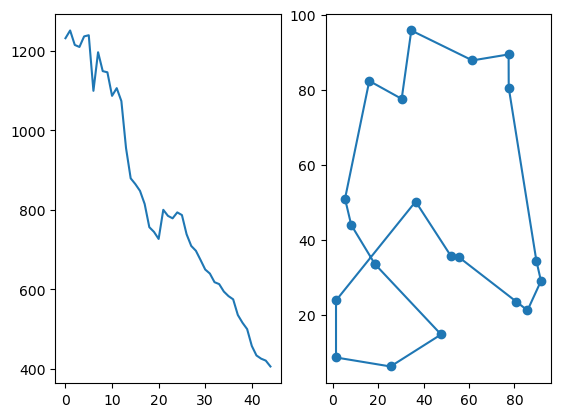

In [244]:
p = create_normal_graph(15)
d = create_unifrom_graph(20)
function = lambda x,i: x*0.95
result1 = annealing_tsp(15, p, 0.8, iterations=35000)
create_vis(result1[0], p, result1[-1])

result2 = annealing_tsp(20, d, 0.8, iterations=45000)
create_vis(result2[0], d, result2[-1])
dataset["t: x*0.95"] = [result1[1], result2[1]]

### TEMPERATURE x2 = 1/(x1+0,001)

In [245]:
def func(i):
    y = 1/(i+0.0001)
    if y < 0.000001:
        return 0
    elif y > 1:
        return 1
    else:
        return y

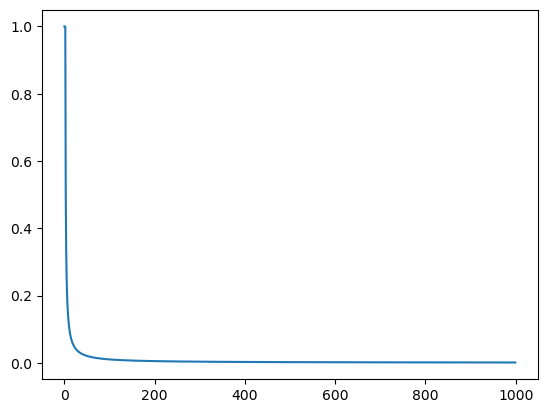

In [246]:
x=[]
x0 = 1
for i in range(1000):
    x.append(x0)
    x0 = func(i)
create_graph(x)

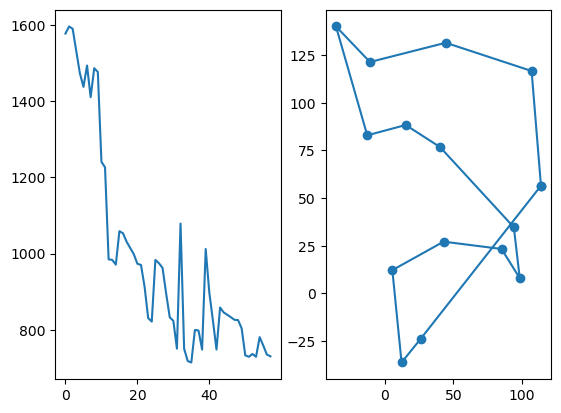

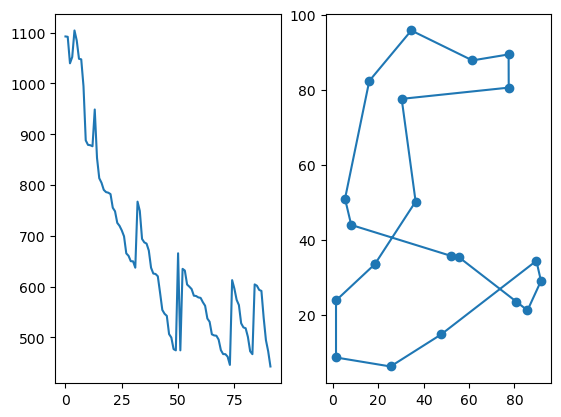

In [247]:
function = lambda x,i: func(i)
result2 = annealing_tsp(15, p, 1, iterations=35000, temperature=function)
create_vis(result2[0], p, result2[-1])

result3 = annealing_tsp(20, d, 1, iterations=45000, temperature=function)
create_vis(result3[0], d, result3[-1])

dataset["t: 1/(i+0.0001)"] = [result2[1], result3[1]]

### TEMPERATURE x2 = x1-0.0001

In [248]:
def func(x):
    y = x -0.0001
    if y < 0:
        return 0
    else:
        return y

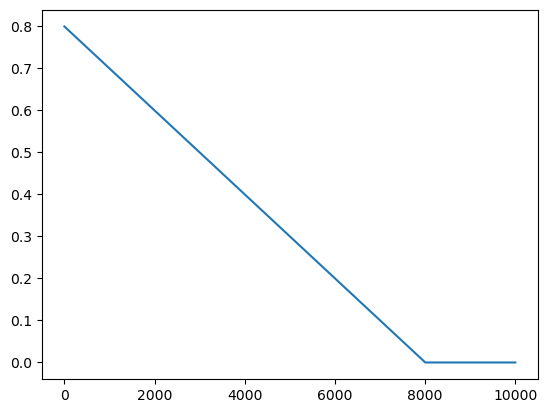

In [249]:
x=[]
x0 = 0.8
for i in range(10000):
    x.append(x0)
    x0 = func(x0)
create_graph(x)

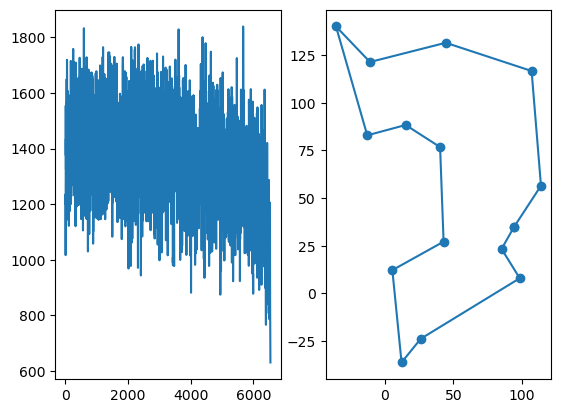

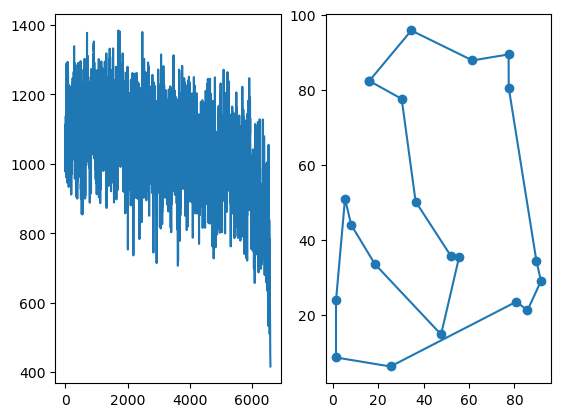

In [250]:
function = lambda x,i: func(x)
result2 = annealing_tsp(15, p, 1, iterations=35000, temperature=function)
create_vis(result2[0], p, result2[-1])

result6 = annealing_tsp(20, d, 1, iterations=45000, temperature=function)
create_vis(result6[0], d, result6[-1])

dataset["t: x - 0.0001"] = [result2[1], result6[1]]

### TEMPERATURE x2 = -i**2 + 0.8

In [251]:
def func(i):
    y = -(i/3000)**2 + 0.8
    if y < 0:
        return 0
    else:
        return y

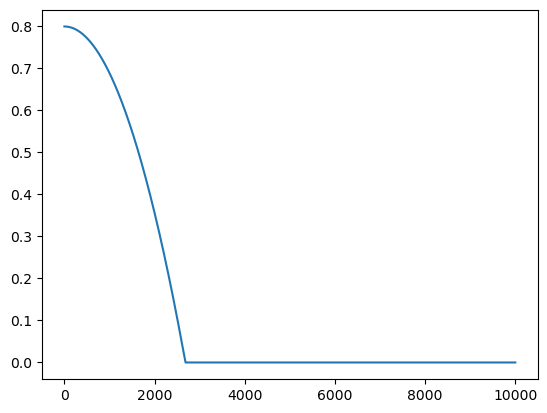

In [252]:
x=[]
x0 = 0.8
for i in range(10000):
    x.append(x0)
    x0 = func(i)
create_graph(x)

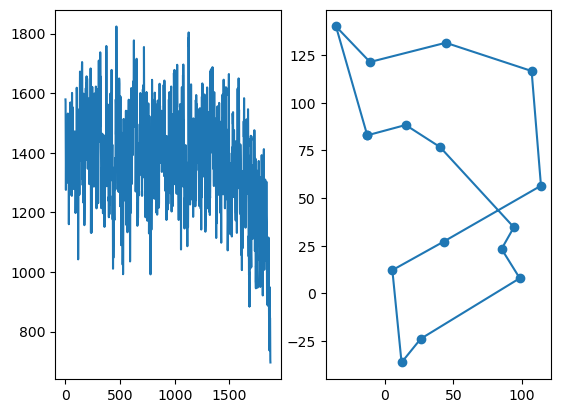

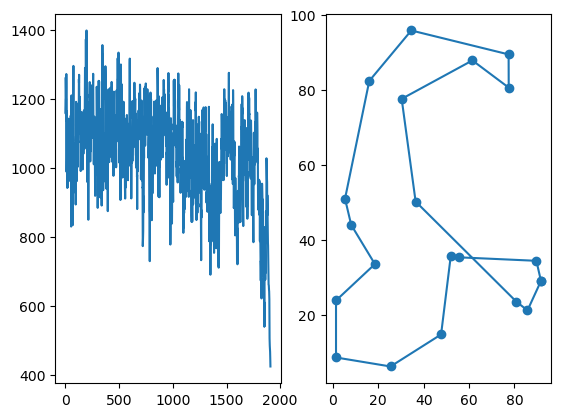

In [253]:
function = lambda x,i: func(i)
result2 = annealing_tsp(15, p, 1, iterations=35000, temperature=function)
create_vis(result2[0], p, result2[-1])

result10 = annealing_tsp(20, d, 1, iterations=45000, temperature=function)
create_vis(result10[0], d, result10[-1])

dataset["t: -(i)**2 + 0.8"] = [result2[1], result10[1]]

In [254]:
dataset

,t: x*0.95,t: 1/(i+0.0001),t: x - 0.0001,t: -(i)**2 + 0.8
0,630.232059,714.404819,630.232059,696.115886
1,405.362193,442.802724,416.303977,423.782141
